In [1]:
import pandas as pd 
import numpy as np 

## 前情提要

Pandas的数据结构有以下兩種类型：
* Series (序列：一维列表）
* DataFrame (数据框：二维表）

# 1. 一微數據結構Series

## 1.1 Series的创建
#### 创建Series 创建一个Series的基本格式是s = Series(data, index=index, name=name)

定义：数据表中的一列或一行，观测向量为一维数组，对于任意一组个体某一属性的观测可抽象为Series的概念。Series默认由index和values构成。

In [2]:
np.random.seed(1)     #使用随机种子，这样每次运行random结果一致，
A=np.random.randn(5)  
print("A is an array:\n",A)
S = pd.Series(A)
print("S is a Series:\n",S)
print("index: ", S.index)  #默认创建索引，注意是从0开始
print("values: ", S.values)

A is an array:
 [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
S is a Series:
 0    1.624345
1   -0.611756
2   -0.528172
3   -1.072969
4    0.865408
dtype: float64
index:  RangeIndex(start=0, stop=5, step=1)
values:  [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


可以在创建Series时添加index，并可使用Series.index查看具体的index。需要注意的一点是，
当从数组创建Series时，若指定index，那么index长度要和data的
长度一致

In [4]:
np.random.seed(2)
s=pd.Series(np.random.randn(5),index=['a','b','c','d','e'])
print (s)
s.index

a   -0.416758
b   -0.056267
c   -2.136196
d    1.640271
e   -1.793436
dtype: float64


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

通过字典（dict）来创建Series。

In [6]:
stocks={'中国平安':'601318','格力电器':'000651','招商银行':'600036',
        '中信证券':'600030','贵州茅台':'600519'}
Series_stocks =pd.Series(stocks)
print (Series_stocks)

中国平安    601318
格力电器    000651
招商银行    600036
中信证券    600030
贵州茅台    600519
dtype: object


使用字典创建Series时指定index的情形（index长度不必和字典相同）。

In [9]:
pd.Series(stocks, index=['中国平安', '格力电器', '招商银行', '中信证券',
                       '工业富联'])
#注意，在原来的stocks（dict）里没有‘工业富联’，因此值为‘NaN’


中国平安    601318
格力电器    000651
招商银行    600036
中信证券    600030
工业富联       NaN
dtype: object

给数据序列和index命名：

In [10]:
Series_stocks.name='股票代码'        #注意python是使用.号来连接和调用
Series_stocks.index.name='股票名称'
print(Series_stocks)

股票名称
中国平安    601318
格力电器    000651
招商银行    600036
中信证券    600030
贵州茅台    600519
Name: 股票代码, dtype: object


## 1.2 Series数据的访问
Series对象的下标运算同时支持位置和标签两种方式

In [18]:
np.random.seed(3)
data=np.random.randn(5)
s = pd.Series(data,index=['a', 'b', 'c', 'd', 'e'])
print(s)

print(s[:2])   #取出第0、1行数据

print(s[[2,0,4]]) #取出第2、0、4行数据

print(s[['e', 'a']]) #取出‘e’、‘a’对应数据


a    1.788628
b    0.436510
c    0.096497
d   -1.863493
e   -0.277388
dtype: float64
a    1.788628
b    0.436510
dtype: float64
c    0.096497
a    1.788628
e   -0.277388
dtype: float64
e   -0.277388
a    1.788628
dtype: float64


## 1.3 Series排序函数

In [21]:
np.random.seed(3)
data=np.random.randn(10)
s = pd.Series(data,index=['j','a', 'c','b', 'd', 'e','h','f','g','i'])
print(s)





j    1.788628
a    0.436510
c    0.096497
b   -1.863493
d   -0.277388
e   -0.354759
h   -0.082741
f   -0.627001
g   -0.043818
i   -0.477218
dtype: float64
a    0.436510
b   -1.863493
c    0.096497
d   -0.277388
e   -0.354759
f   -0.627001
g   -0.043818
h   -0.082741
i   -0.477218
j    1.788628
dtype: float64
b   -1.863493
f   -0.627001
i   -0.477218
e   -0.354759
d   -0.277388
h   -0.082741
g   -0.043818
c    0.096497
a    0.436510
j    1.788628
dtype: float64


In [22]:
#排序
s.sort_index(ascending=True) #按index从小到大，False从大到小

a    0.436510
b   -1.863493
c    0.096497
d   -0.277388
e   -0.354759
f   -0.627001
g   -0.043818
h   -0.082741
i   -0.477218
j    1.788628
dtype: float64

In [23]:
s.sort_values(ascending=True)

b   -1.863493
f   -0.627001
i   -0.477218
e   -0.354759
d   -0.277388
h   -0.082741
g   -0.043818
c    0.096497
a    0.436510
j    1.788628
dtype: float64

In [28]:
s.rank(method='average',ascending=True,axis=0) #每个数的平均排名

# 为各组分配一个平均排名：
# Series.rank(method='average',ascending=True,axis=0)  
# rank的method选项：  
# 'average'：在相等分组中，为各个值分配平均排名  
# 'max','min'：使用整个分组中的最小排名
# 'first'：按值在原始数据中出现的顺序排名

j    10.0
a     9.0
c     8.0
b     1.0
d     5.0
e     4.0
h     6.0
f     2.0
g     7.0
i     3.0
dtype: float64

In [25]:
#返回含有最大值的索引位置： 
print(s.idxmax())
#返回含有最小值的索引位置： 
print(s.idxmin())

j
b


# 2. 二維數據結構Pandas

DataFrame是一个二维的数据结构，通过数据组，index和columns构成

## 2.1 DataFrame数据表的创建
DataFrame是多个Series的集合体。  
先创建一个值是Series的字典，并转换为DataFrame。

In [29]:
#通过字典创建DataFrame
d={'one':pd.Series([1.,2.,3.],index=['a','b','c']),
   'two':pd.Series([1.,2.,3.,4.,],index=['a','b','c','d']),
   'three':range(4),
   'four':1.,
   'five':'f'}
df=pd.DataFrame(d)
print (df)

   one  two  three  four five
a  1.0  1.0      0   1.0    f
b  2.0  2.0      1   1.0    f
c  3.0  3.0      2   1.0    f
d  NaN  4.0      3   1.0    f


In [30]:
#可以使用dataframe.index和dataframe.columns来查看DataFrame的行和列，
#dataframe.values则以数组的形式返回DataFrame的元素
print ("DataFrame index:\n",df.index)
print ("DataFrame columns:\n",df.columns)
print ("DataFrame values:\n",df.values)

DataFrame index:
 Index(['a', 'b', 'c', 'd'], dtype='object')
DataFrame columns:
 Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
DataFrame values:
 [[1.0 1.0 0 1.0 'f']
 [2.0 2.0 1 1.0 'f']
 [3.0 3.0 2 1.0 'f']
 [nan 4.0 3 1.0 'f']]


In [33]:
#DataFrame也可以从值是数组的字典创建，但是各个数组的长度需要相同：
d = {'one': [1., 2., 3., 4.], 'two': [4., 3., 2., 1.]}
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
print (df)

   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


In [35]:
#在实际处理数据时，有时需要创建一个空的DataFrame，可以这么做
df = pd.DataFrame()
print (df)

Empty DataFrame
Columns: []
Index: []


In [36]:
#另一种创建DataFrame的方法十分有用，那就是使用concat函数基于Series
#或者DataFrame创建一个DataFrame
a = pd.Series(range(5))   #range(5)产生0到4 
b = pd.Series(np.linspace(4, 20, 5)) #linspace(a,b,c)
df = pd.concat([a, b], axis=1)
print (df)

   0     1
0  0   4.0
1  1   8.0
2  2  12.0
3  3  16.0
4  4  20.0


其中的axis=1表示按列进行合并，axis=0表示按行合并，  
并且，Series都处理成一列，所以这里如果选axis=0的话，  
将得到一个10×1的DataFrame。下面这个例子展示了如何按行合并  
DataFrame成一个大的DataFrame：

In [43]:
df = pd.DataFrame()
index = ['alpha', 'beta', 'gamma', 'delta', 'eta']
for i in range(5):
    a = pd.DataFrame([np.linspace(i,i*5,5)], index = [index[i]])
    df = pd.concat([df,a],axis = 0)
print (df)

         0    1     2     3     4
alpha  0.0  0.0   0.0   0.0   0.0
beta   1.0  2.0   3.0   4.0   5.0
gamma  2.0  4.0   6.0   8.0  10.0
delta  3.0  6.0   9.0  12.0  15.0
eta    4.0  8.0  12.0  16.0  20.0


## 2.2 DataFrame数据的访问

In [44]:
#DataFrame是以列作为操作的基础的，全部操作都想象成先从DataFrame里取一列，
#再从这个Series取元素即可。
#可以用datafrae.column_name选取列，也可以使用dataframe[]操作选取列
df = pd.DataFrame()
index = ['alpha', 'beta', 'gamma', 'delta', 'eta']
for i in range(5):
    a = pd.DataFrame([np.linspace(i, 5*i, 5)], index=[index[i]])
    df = pd.concat([df, a], axis=0)
print('df: \n',df)
print ("df[1]:\n",df[1])
df.columns = ['a', 'b', 'c', 'd', 'e']
print('df: \n',df)
print ("df[b]:\n",df['b'])
print ("df.b:\n",df.b)
print ("df[['a','b']]:\n",df[['a', 'd']])

df: 
          0    1     2     3     4
alpha  0.0  0.0   0.0   0.0   0.0
beta   1.0  2.0   3.0   4.0   5.0
gamma  2.0  4.0   6.0   8.0  10.0
delta  3.0  6.0   9.0  12.0  15.0
eta    4.0  8.0  12.0  16.0  20.0
df[1]:
 alpha    0.0
beta     2.0
gamma    4.0
delta    6.0
eta      8.0
Name: 1, dtype: float64
df: 
          a    b     c     d     e
alpha  0.0  0.0   0.0   0.0   0.0
beta   1.0  2.0   3.0   4.0   5.0
gamma  2.0  4.0   6.0   8.0  10.0
delta  3.0  6.0   9.0  12.0  15.0
eta    4.0  8.0  12.0  16.0  20.0
df[b]:
 alpha    0.0
beta     2.0
gamma    4.0
delta    6.0
eta      8.0
Name: b, dtype: float64
df.b:
 alpha    0.0
beta     2.0
gamma    4.0
delta    6.0
eta      8.0
Name: b, dtype: float64
df[['a','b']]:
          a     d
alpha  0.0   0.0
beta   1.0   4.0
gamma  2.0   8.0
delta  3.0  12.0
eta    4.0  16.0


In [48]:
#访问特定的元素可以如Series一样使用下标或者是索引:
print (df['b'][2])       #第b列，第3行（从0开始算）
print (df['b']['gamma']) #第b列，gamma对应行

4.0
4.0


##### df.loc['列或行名']，df.iloc[n]第n行，df.iloc[:,n]第n列

In [ ]:
#若需要选取行，可以使用dataframe.iloc按下标选取，
#或者使用dataframe.loc按索引选取
print (df.iloc[1])    #选取第一行元素
print (df.loc['beta'])#选取beta对应行元素

In [49]:
#选取行还可以使用切片的方式或者是布尔类型的向量：
print ("切片取数:\n",df[1:3])
bool_vec = [True, False, True, True, False]
print ("根据布尔类型取值:\n",df[bool_vec]) #相当于选取第0、2、3行

切片取数:
          a    b    c    d     e
beta   1.0  2.0  3.0  4.0   5.0
gamma  2.0  4.0  6.0  8.0  10.0
根据布尔类型取值:
          a    b    c     d     e
alpha  0.0  0.0  0.0   0.0   0.0
gamma  2.0  4.0  6.0   8.0  10.0
delta  3.0  6.0  9.0  12.0  15.0


In [50]:
#行列组合起来选取数据：
print (df[['b', 'd']].iloc[[1, 3]])
print (df.iloc[[1, 3]][['b', 'd']])
print (df[['b', 'd']].loc[['beta', 'delta']])
print (df.loc[['beta', 'delta']][['b', 'd']])

         b     d
beta   2.0   4.0
delta  6.0  12.0
         b     d
beta   2.0   4.0
delta  6.0  12.0
         b     d
beta   2.0   4.0
delta  6.0  12.0
         b     d
beta   2.0   4.0
delta  6.0  12.0


In [52]:
#如果不是需要访问特定行列，而只是某个特殊位置的元素的话，
#dataframe.at和dataframe.iat
#是最快的方式，它们分别用于使用索引和下标进行访问
print (df)
print (df.iat[2, 3])  #相当于第3行第4列
print (df.at['gamma', 'd'])

         a    b     c     d     e
alpha  0.0  0.0   0.0   0.0   0.0
beta   1.0  2.0   3.0   4.0   5.0
gamma  2.0  4.0   6.0   8.0  10.0
delta  3.0  6.0   9.0  12.0  15.0
eta    4.0  8.0  12.0  16.0  20.0
8.0
8.0


## 2.3创建时间序列

pandas.date_range(start=None, end=None, periods=None, freq='D',
   tz=None, normalize=False, name=None, closed=None, **kwargs)

In [53]:
dates=pd.date_range('20180101',periods=12,freq='m')
print (dates)
pd.DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
  '2018-10-31', '2018-11-30', '2018-12-31'], dtype='datetime64[ns]', 
  freq='M')
np.random.seed(5)
df=pd.DataFrame(np.random.randn(12,4),index=dates,
                 columns=list('ABCD'))
df

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')


,A,B,C,D
2018-01-31,0.441227,-0.330870,2.430771,-0.252092
2018-02-28,0.109610,1.582481,-0.909232,-0.591637
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877
2018-04-30,-0.358829,0.603472,-1.664789,-0.700179
2018-05-31,1.151391,1.857331,-1.511180,0.644848
2018-06-30,-0.980608,-0.856853,-0.871879,-0.422508
2018-07-31,0.996440,0.712421,0.059144,-0.363311
2018-08-31,0.003289,-0.105930,0.793053,-0.631572
2018-09-30,-0.006195,-0.101068,-0.052308,0.249218
2018-10-31,0.197660,1.334849,-0.086876,1.561532


In [54]:
#查看数据头n行 ,默认n=5
df.head()

,A,B,C,D
2018-01-31,0.441227,-0.330870,2.430771,-0.252092
2018-02-28,0.109610,1.582481,-0.909232,-0.591637
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877
2018-04-30,-0.358829,0.603472,-1.664789,-0.700179
2018-05-31,1.151391,1.857331,-1.511180,0.644848


In [55]:
#查看数据最后3行
df.tail(3)

,A,B,C,D
2018-10-31,0.197660,1.334849,-0.086876,1.561532
2018-11-30,-0.305853,-0.477731,0.100738,0.355438
2018-12-31,0.269612,1.291963,1.139343,0.494440


In [59]:
#查看数据的index(索引）,columns （列名）和数据
print(df.index)
pd.DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
 '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
  '2018-10-31', '2018-11-30', '2018-12-31'], dtype='datetime64[ns]', 
  freq='M')
print(df.columns)

pd.Index(['A', 'B', 'C', 'D'], dtype='object')

print(df.values)

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 0.44122749 -0.33087015  2.43077119 -0.25209213]
 [ 0.10960984  1.58248112 -0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996 -1.19276461 -0.20487651]
 [-0.35882895  0.6034716  -1.66478853 -0.70017904]
 [ 1.15139101  1.85733101 -1.51117956  0.64484751]
 [-0.98060789 -0.85685315 -0.87187918 -0.42250793]
 [ 0.99643983  0.71242127  0.05914424 -0.36331088]
 [ 0.00328884 -0.10593044  0.79305332 -0.63157163]
 [-0.00619491 -0.10106761 -0.05230815  0.24921766]
 [ 0.19766009  1.33484857 -0.08687561  1.56153229]
 [-0.30585302 -0.47773142  0.10073819  0.35543847]
 [ 0.26961241  1.29196338  1.13934298  0.4944404 ]]


根据索引排序数据排序：（按行axis=0或列axis=1）

In [70]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D
2018-01-31,0.441227,-0.330870,2.430771,-0.252092
2018-02-28,0.109610,1.582481,-0.909232,-0.591637
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877
2018-04-30,-0.358829,0.603472,-1.664789,-0.700179
2018-05-31,1.151391,1.857331,-1.511180,0.644848
2018-06-30,-0.980608,-0.856853,-0.871879,-0.422508
2018-07-31,0.996440,0.712421,0.059144,-0.363311
2018-08-31,0.003289,-0.105930,0.793053,-0.631572
2018-09-30,-0.006195,-0.101068,-0.052308,0.249218
2018-10-31,0.197660,1.334849,-0.086876,1.561532


In [71]:
#按某列的值排序
df.sort_values('A')  #按A列的值从小到大排序

,A,B,C,D
2018-06-30,-0.980608,-0.856853,-0.871879,-0.422508
2018-04-30,-0.358829,0.603472,-1.664789,-0.700179
2018-11-30,-0.305853,-0.477731,0.100738,0.355438
2018-09-30,-0.006195,-0.101068,-0.052308,0.249218
2018-08-31,0.003289,-0.105930,0.793053,-0.631572
2018-02-28,0.109610,1.582481,-0.909232,-0.591637
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877
2018-10-31,0.197660,1.334849,-0.086876,1.561532
2018-12-31,0.269612,1.291963,1.139343,0.494440
2018-01-31,0.441227,-0.330870,2.430771,-0.252092


In [77]:
print(df.head(5))
#数据选取loc和iloc
df.loc[dates[0]]

df.loc['20180131':'20180430',['A','C']]  #根据标签取数

                   A         B         C         D
2018-01-31  0.441227 -0.330870  2.430771 -0.252092
2018-02-28  0.109610  1.582481 -0.909232 -0.591637
2018-03-31  0.187603 -0.329870 -1.192765 -0.204877
2018-04-30 -0.358829  0.603472 -1.664789 -0.700179
2018-05-31  1.151391  1.857331 -1.511180  0.644848


,A,C
2018-01-31,0.441227,2.430771
2018-02-28,0.109610,-0.909232
2018-03-31,0.187603,-1.192765
2018-04-30,-0.358829,-1.664789


In [78]:
df.iloc[1:3,1:4]  #根据所在位置取数，注意从0开始数

,B,C,D
2018-02-28,1.582481,-0.909232,-0.591637
2018-03-31,-0.329870,-1.192765,-0.204877


In [79]:
df.iloc[[1,3,5],[0,3]]  #根据特定行和列取数

,A,D
2018-02-28,0.109610,-0.591637
2018-04-30,-0.358829,-0.700179
2018-06-30,-0.980608,-0.422508


In [80]:
df[df.A>0] #相当于取出A列大于0时的数据列表

,A,B,C,D
2018-01-31,0.441227,-0.330870,2.430771,-0.252092
2018-02-28,0.109610,1.582481,-0.909232,-0.591637
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877
2018-05-31,1.151391,1.857331,-1.511180,0.644848
2018-07-31,0.996440,0.712421,0.059144,-0.363311
2018-08-31,0.003289,-0.105930,0.793053,-0.631572
2018-10-31,0.197660,1.334849,-0.086876,1.561532
2018-12-31,0.269612,1.291963,1.139343,0.494440


In [81]:
df[df>0]  #显示值大于0的数，其余使用NaN代替

#為何會產生NaN是因為df>0會產生一個布林遮罩，而df[df>0]便會保留True的值，其它變成NaN其它變成NaN

#注意!!!此方法不會改變資料結構，但上面的那個會

,A,B,C,D
2018-01-31,0.441227,NaN,2.430771,NaN
2018-02-28,0.109610,1.582481,NaN,NaN
2018-03-31,0.187603,NaN,NaN,NaN
2018-04-30,NaN,0.603472,NaN,NaN
2018-05-31,1.151391,1.857331,NaN,0.644848
2018-06-30,NaN,NaN,NaN,NaN
2018-07-31,0.996440,0.712421,0.059144,NaN
2018-08-31,0.003289,NaN,0.793053,NaN
2018-09-30,NaN,NaN,NaN,0.249218
2018-10-31,0.197660,1.334849,NaN,1.561532


##### 直覺記憶法
* df[df > 0] 👉 "數值層級的篩選"（保留符合條件的數值，不符合的變 NaN）。
* df[df.A > 0] 👉 "列層級的篩選"（A 欄符合條件時，整列數據保留，否則刪除）。

数据筛选isin()

In [82]:
df2=df.copy() #复制df数据
df2['E']=np.arange(12)
df2

,A,B,C,D,E
2018-01-31,0.441227,-0.330870,2.430771,-0.252092,0
2018-02-28,0.109610,1.582481,-0.909232,-0.591637,1
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877,2
2018-04-30,-0.358829,0.603472,-1.664789,-0.700179,3
2018-05-31,1.151391,1.857331,-1.511180,0.644848,4
2018-06-30,-0.980608,-0.856853,-0.871879,-0.422508,5
2018-07-31,0.996440,0.712421,0.059144,-0.363311,6
2018-08-31,0.003289,-0.105930,0.793053,-0.631572,7
2018-09-30,-0.006195,-0.101068,-0.052308,0.249218,8
2018-10-31,0.197660,1.334849,-0.086876,1.561532,9


In [85]:
print(df2['E'].isin([0,2,4]))
df2[df2['E'].isin([0,2,4])]

2018-01-31     True
2018-02-28    False
2018-03-31     True
2018-04-30    False
2018-05-31     True
2018-06-30    False
2018-07-31    False
2018-08-31    False
2018-09-30    False
2018-10-31    False
2018-11-30    False
2018-12-31    False
Freq: M, Name: E, dtype: bool


,A,B,C,D,E
2018-01-31,0.441227,-0.330870,2.430771,-0.252092,0
2018-03-31,0.187603,-0.329870,-1.192765,-0.204877,2
2018-05-31,1.151391,1.857331,-1.511180,0.644848,4


# 3.缺失值處裡

### 缺失值用NaN显示

In [127]:
date3=pd.date_range('20181001',periods=5)
np.random.seed(6)
data=np.random.randn(5,4)
df3 = pd.DataFrame(data = data, index=date3, columns=list('ABCD'))
df3

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,1.127064,-1.514093
2018-10-03,1.639291,-0.429894,2.631281,0.601822
2018-10-04,-0.335882,1.237738,0.111128,0.129151
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [128]:
df3.iat[3,3]=np.NAN#令第3行第3列的数为缺失值（0.129151）
df3.iat[1,2]=np.NAN  #令第1行第2列的数为缺失值（1.127064）
df3

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,NaN,-1.514093
2018-10-03,1.639291,-0.429894,2.631281,0.601822
2018-10-04,-0.335882,1.237738,0.111128,NaN
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [95]:
#丢弃存在缺失值的行
#设定how=all只会删除那些全是NaN的列：
df3.dropna(how='any')

# how='any'	只要該行/列有 NaN，就刪除
# how='all'	只有該行/列全部都是 NaN 才刪除

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-03,1.639291,-0.429894,2.631281,0.601822
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [98]:
#删除行也一样，设置axis=1
df3.dropna(how = 'any',axis=1)

,A,B
2018-10-01,-0.311784,0.729004
2018-10-02,-2.486781,0.913252
2018-10-03,1.639291,-0.429894
2018-10-04,-0.335882,1.237738
2018-10-05,0.076128,-0.155128


In [129]:
#thresh参数,如thresh=4,一行中至少有4个非NaN值，否则删除
df3.iloc[2,2]=np.NaN
df3.dropna(thresh=4)
#thresh 是 threshold的簡寫

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-05,0.076128,-0.155128,0.634225,0.810655


### 填充缺失值  
fillna 还可以使用 method 参数  
method 可以使用下面的方法  
1. pad/ffill：用前一个非缺失值去填充该缺失值  
2. backfill/bfill：用下一个非缺失值填充该缺失值

In [125]:
print(df3)
df3.fillna(method='ffill') # 用前個數值填

                   A         B         C         D
2018-10-01 -0.311784  0.729004  0.217821 -0.899092
2018-10-02 -2.486781  0.913252       NaN -1.514093
2018-10-03  1.639291 -0.429894       NaN  0.601822
2018-10-04 -0.335882  1.237738  0.111128       NaN
2018-10-05  0.076128 -0.155128  0.634225  0.810655


,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,0.217821,-1.514093
2018-10-03,1.639291,-0.429894,0.217821,0.601822
2018-10-04,-0.335882,1.237738,0.111128,0.601822
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [107]:
df3.fillna(method='bfill') # 用後個數值填

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,0.111128,-1.514093
2018-10-03,1.639291,-0.429894,0.111128,0.601822
2018-10-04,-0.335882,1.237738,0.111128,0.810655
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [132]:
df3

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,0.321058,-1.514093
2018-10-03,1.639291,-0.429894,0.321058,0.601822
2018-10-04,-0.335882,1.237738,0.111128,NaN
2018-10-05,0.076128,-0.155128,0.634225,0.810655


In [131]:
#使在改变DataFrame 和 Series 的操作时，会返回一个新的对象，
#原对象不变，如果要改变原对象，可以添加参数 inplace = True用列均值填充
#使用该列的均值填充
df3['C'].fillna(df3['C'].mean(),inplace=True)
df3

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,0.321058,-1.514093
2018-10-03,1.639291,-0.429894,0.321058,0.601822
2018-10-04,-0.335882,1.237738,0.111128,NaN
2018-10-05,0.076128,-0.155128,0.634225,0.810655


補充，inplace = True就是直接替換原表
，如果不想這樣寫只能換以下形式

In [133]:
df3['C'] = df3['C'].fillna(df3['C'].mean())
df3

,A,B,C,D
2018-10-01,-0.311784,0.729004,0.217821,-0.899092
2018-10-02,-2.486781,0.913252,0.321058,-1.514093
2018-10-03,1.639291,-0.429894,0.321058,0.601822
2018-10-04,-0.335882,1.237738,0.111128,NaN
2018-10-05,0.076128,-0.155128,0.634225,0.810655


# 4.統計

In [155]:
date4=pd.date_range('20181001',periods=5)
np.random.seed(7)
data4=np.random.randn(5,4)
df4=pd.DataFrame(data4,index=date3,columns=list('ABCD'))
df4

,A,B,C,D
2018-10-01,1.690526,-0.465937,0.032820,0.407516
2018-10-02,-0.788923,0.002066,-0.000890,-1.754724
2018-10-03,1.017658,0.600499,-0.625429,-0.171548
2018-10-04,0.505299,-0.261356,-0.242749,-1.453241
2018-10-05,0.554580,0.123881,0.274460,-1.526525


描述性统计 df.describe()

In [135]:
df4.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,0.595828,-0.000170,-0.112358,-0.899704
std,0.908809,0.406618,0.340358,0.957784
min,-0.788923,-0.465937,-0.625429,-1.754724
25%,0.505299,-0.261356,-0.242749,-1.526525
50%,0.554580,0.002066,-0.000890,-1.453241
75%,1.017658,0.123881,0.032820,-0.171548
max,1.690526,0.600499,0.274460,0.407516


In [138]:
df4.mean() #均值，默认按列axis=0


A    0.595828
B   -0.000170
C   -0.112358
D   -0.899704
dtype: float64

In [139]:
df4.mean(axis=1)  #按行

2018-10-01    0.416231
2018-10-02   -0.635618
2018-10-03    0.205295
2018-10-04   -0.363012
2018-10-05   -0.143401
Freq: D, dtype: float64

对数据使用函数df.apply()

In [153]:
df4.apply(np.cumsum,axis=0) #np.cumsum()累加函数

,A,B,C,D,E
2018-10-01,1.690526,-0.465937,0.032820,0.407516,a
2018-10-02,0.901603,-0.463872,0.031930,-1.347208,aa
2018-10-03,1.919261,0.136627,-0.593499,-1.518756,aaa
2018-10-04,2.424560,-0.124730,-0.836248,-2.971998,aaab
2018-10-05,2.979140,-0.000849,-0.561788,-4.498522,aaabb


In [156]:
df4.apply(lambda x:x.max()-x.min()) #lambda自定义函数
#相当于计算每列里最大值-最小值

A    2.479449
B    1.066436
C    0.899889
D    2.162241
dtype: float64

In [160]:
# 補充下，上面也能用以下手法達成
def range_func(x):
    return x.max()-x.min()
    
df4.apply(range_func)  

#lambda就是有點縮寫的感覺  

A    2.479449
B    1.066436
C    0.899889
D    2.162241
dtype: float64

In [148]:
df4['E']=['a','a','a','b','b']
df4

,A,B,C,D,E
2018-10-01,1.690526,-0.465937,0.032820,0.407516,a
2018-10-02,-0.788923,0.002066,-0.000890,-1.754724,a
2018-10-03,1.017658,0.600499,-0.625429,-0.171548,a
2018-10-04,0.505299,-0.261356,-0.242749,-1.453241,b
2018-10-05,0.554580,0.123881,0.274460,-1.526525,b


In [149]:
#计算某个值出现评率
df4['E'].value_counts()

E
a    3
b    2
Name: count, dtype: int64

# 5.數據合併

In [166]:
#Concat（）
d1=pd.Series(range(5))
print(d1)
d2=pd.Series(range(5,10))
print(d2)

pd.concat([d1,d2],axis=1)

0    0
1    1
2    2
3    3
4    4
dtype: int64
0    5
1    6
2    7
3    8
4    9
dtype: int64


,0,1
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [177]:
#pd.merge(left_on=None, right_on=None, left_index=False, 
#right_index=False)
np.random.seed(1)
d1=pd.DataFrame(np.random.randn(3,3),columns=list('ABC'))
print(d1)
d2=pd.DataFrame(np.random.randn(3,3),columns=list('DEF'))
print(d2)
pd.merge(d1,d2,left_index=True, right_index=True)
#本題因為沒有相同的column，所以只能用Index合併，切忌兩邊都要開，不能只開一半

          A         B         C
0  1.624345 -0.611756 -0.528172
1 -1.072969  0.865408 -2.301539
2  1.744812 -0.761207  0.319039
          D         E         F
0 -0.249370  1.462108 -2.060141
1 -0.322417 -0.384054  1.133769
2 -1.099891 -0.172428 -0.877858


,A,B,C,D,E,F
0,1.624345,-0.611756,-0.528172,-0.249370,1.462108,-2.060141
1,-1.072969,0.865408,-2.301539,-0.322417,-0.384054,1.133769
2,1.744812,-0.761207,0.319039,-1.099891,-0.172428,-0.877858


In [184]:
#增加數據演示
df = pd.DataFrame(np.random.randn(3, 3), columns=['A','B','C'])
df


,A,B,C
0,-0.298093,0.488518,-0.075572
1,1.131629,1.519817,2.185575
2,-1.396496,-1.444114,-0.504466


In [186]:
s=pd.Series([1.,1,1],index=list('ABC'))
df = pd.concat([df, s.to_frame().T], ignore_index=True)
df
#s.to_frame()：把 Series 轉成 DataFrame
#.T：轉置，讓 Series 變成 一列資料

,A,B,C
0,-0.298093,0.488518,-0.075572
1,1.131629,1.519817,2.185575
2,-1.396496,-1.444114,-0.504466
3,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000


### 聚类分析 groupby

In [193]:
np.random.seed(2)
df = pd.DataFrame({'A' : ['true', 'false', 'true', 'false','true', 'false', 'true', 'false'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,true,one,-0.416758,-1.057952
1,false,one,-0.056267,-0.909008
2,true,two,-2.136196,0.551454
3,false,three,1.640271,2.292208
4,true,two,-1.793436,0.041539
5,false,two,-0.841747,-1.117925
6,true,one,0.502881,0.539058
7,false,three,-1.245288,-0.596160


In [194]:
df.groupby(['A']).sum()  #以A列特征分类并加总

,B,C,D
A,,,
false,onethreetwothree,-0.503031,-0.330885
true,onetwotwoone,-3.843508,0.074100


In [195]:
df.groupby(['A','B']).sum()

C         D
A     B                        
false one   -0.056267 -0.909008
      three  0.394983  1.696048
      two   -0.841747 -1.117925
true  one    0.086124 -0.518894
      two   -3.929632  0.592993

### 數據透視表

In [196]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.019130,-1.421217
1,one,B,foo,1.175001,-0.153495
2,two,C,foo,-0.747871,-0.269057
3,three,A,bar,0.009025,2.231367
4,one,B,bar,-0.878108,-2.434768
5,one,C,bar,-0.156434,0.112727
6,two,A,foo,0.256570,0.370445
7,three,B,foo,-0.988779,1.359634
8,one,C,foo,-0.338822,0.501857
9,one,A,bar,-0.236184,-0.844214


以下指令功能為:
1. 將 DataFrame 轉換為「樞紐表」格式（Pivot Table）。
2. 根據 A 和 B 作為索引 (index=['A', 'B'])。
3. 根據 C 作為欄位 (columns=['C'])。
4. D 作為數值 (values='D')，預設計算平均值 (aggfunc='mean')。

In [197]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.236184 -0.019130
      B -0.878108  1.175001
      C -0.156434 -0.338822
three A  0.009025       NaN
      B       NaN -0.988779
      C -1.187612       NaN
two   A       NaN  0.256570
      B -0.637655       NaN
      C       NaN -0.747871

# 6. 數據可視化

### 模擬股票走勢可視化

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

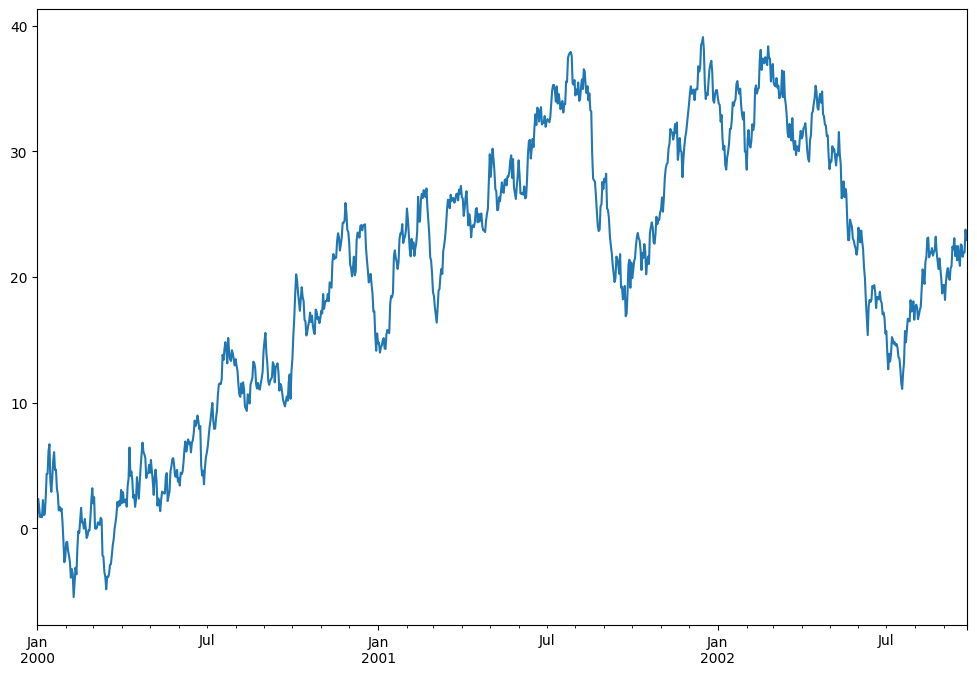

In [208]:
# pip install tushare 
# 若沒安裝先安裝
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',
                periods=1000))
ts = ts.cumsum()
ts.plot(figsize=(12,8))


### 台積電股票模擬

[*********************100%***********************]  1 of 1 completed


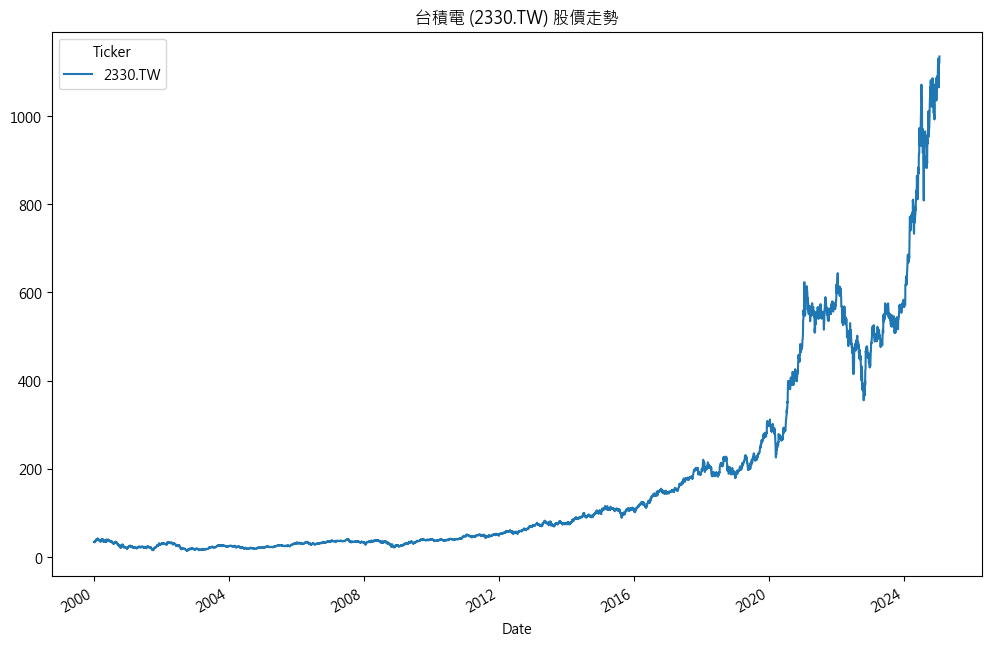

In [212]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl  
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False 

# 下載台積電（2330.TW）股價
df = yf.download("2330.TW", start="1990-01-01")

# 畫股價走勢圖
df['Close'].plot(figsize=(12, 8))
plt.title("台積電 (2330.TW) 股價走勢")
plt.show()

